In [1]:
!pip install google-play-scraper


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install sastrawi


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from google_play_scraper import app, reviews, Sort, reviews_all
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\taqiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taqiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
app_reviews_df = pd.read_csv('ulasan_aplikasi_bca.csv')

In [7]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55779 entries, 0 to 55778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  55741 non-null  object
dtypes: object(1)
memory usage: 435.9+ KB


In [8]:
app_reviews_df.head()

,Review
0,"Hi, just wanna give a minor feedback on the la..."
1,"The app has been crashing all day, making it i..."
2,Encountered some problems after reset the phon...
3,"I couldn't enter, there is always a sign ""no c..."
4,Hey! What's wrong with you! Been crashed and c...


In [9]:
clean_df = app_reviews_df.dropna()

In [10]:
clean_df.shape

(55741, 1)

In [11]:
clean_df = clean_df.drop_duplicates()

clean_df.shape

(41870, 1)

In [12]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) 
    text = re.sub(r'#[A-Za-z0-9]+', '', text) 
    text = re.sub(r'RT[\s]', '', text) 
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text) 
    text = re.sub(r'[^\w\s]', '', text)
 
    text = text.replace('\n', ' ') 
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    text = text.strip(' ') 
    return text
 
def casefoldingText(text): 
    text = text.lower()
    return text
 
def tokenizingText(text): 
    text = word_tokenize(text)
    return text
 
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(["woyy","kak","kaka","kakak",'iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): 
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    words = text.split()
 
    stemmed_words = [stemmer.stem(word) for word in words]
 
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
slangwords_df = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')

slang_to_formal_dict = dict(zip(slangwords_df['slang'], slangwords_df['formal']))

def replaceSlang(text):
  words = text.split()
  replaced_words = [slang_to_formal_dict.get(word, word) for word in words]
  return ' '.join(replaced_words)

In [14]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['Review'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(replaceSlang)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [15]:
clean_df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"Hi, just wanna give a minor feedback on the la...",Hi just wanna give a minor feedback on the lat...,hi just wanna give a minor feedback on the lat...,hi just wanna give a minor feedback on the lat...,"[hi, just, wan, na, give, a, minor, feedback, ...","[hi, wan, give, minor, feedback, latest, versi...",hi wan give minor feedback latest version plea...
1,"The app has been crashing all day, making it i...",The app has been crashing all day making it im...,the app has been crashing all day making it im...,the app has been crashing all day making itu i...,"[the, app, has, been, crashing, all, day, maki...","[app, crashing, day, making, impossible, compl...",app crashing day making impossible complete qr...
2,Encountered some problems after reset the phon...,Encountered some problems after reset the phon...,encountered some problems after reset the phon...,encountered some problems after reset the phon...,"[encountered, some, problems, after, reset, th...","[encountered, problems, reset, phone, app, req...",encountered problems reset phone app requires ...
3,"I couldn't enter, there is always a sign ""no c...",I couldnt enter there is always a sign no conn...,i couldnt enter there is always a sign no conn...,i couldnt enter there is always a sign no conn...,"[i, couldnt, enter, there, is, always, a, sign...","[couldnt, enter, always, sign, connection, use...",couldnt enter always sign connection use app c...
4,Hey! What's wrong with you! Been crashed and c...,Hey Whats wrong with you Been crashed and clos...,hey whats wrong with you been crashed and clos...,hey whats wrong with you been crashed and clos...,"[hey, whats, wrong, with, you, been, crashed, ...","[hey, whats, wrong, crashed, closed, suddenly,...",hey whats wrong crashed closed suddenly days a...
...,...,...,...,...,...,...,...
55754,👍👍👍👍👍👍👍👍👍👍👍,,,,[],[],
55756,💛💛💛💛,,,,[],[],
55768,👎,,,,[],[],
55770,Oke...,Oke,oke,oke,[oke],[oke],oke


In [16]:
import csv 
import requests
from io import StringIO

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1]) 
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1]) 

else:
    print("Failed to fetch negative lexicon data")

In [17]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if(word in lexicon_positive):
            score += lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score += lexicon_negative[word]
    
    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    
    return score, polarity

In [18]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

print(clean_df['polarity'].value_counts())
print(clean_df['polarity_score'].value_counts())

polarity
negative    16521
positive    15806
neutral      9543
Name: count, dtype: int64
polarity_score
 0     9543
 5     2707
 3     2429
 2     2369
-3     2364
       ... 
 46       1
-39       1
 38       1
 33       1
-35       1
Name: count, Length: 82, dtype: int64


In [19]:
clean_df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,"Hi, just wanna give a minor feedback on the la...",Hi just wanna give a minor feedback on the lat...,hi just wanna give a minor feedback on the lat...,hi just wanna give a minor feedback on the lat...,"[hi, just, wan, na, give, a, minor, feedback, ...","[hi, wan, give, minor, feedback, latest, versi...",hi wan give minor feedback latest version plea...,-1,negative
1,"The app has been crashing all day, making it i...",The app has been crashing all day making it im...,the app has been crashing all day making it im...,the app has been crashing all day making itu i...,"[the, app, has, been, crashing, all, day, maki...","[app, crashing, day, making, impossible, compl...",app crashing day making impossible complete qr...,2,positive
2,Encountered some problems after reset the phon...,Encountered some problems after reset the phon...,encountered some problems after reset the phon...,encountered some problems after reset the phon...,"[encountered, some, problems, after, reset, th...","[encountered, problems, reset, phone, app, req...",encountered problems reset phone app requires ...,-2,negative
3,"I couldn't enter, there is always a sign ""no c...",I couldnt enter there is always a sign no conn...,i couldnt enter there is always a sign no conn...,i couldnt enter there is always a sign no conn...,"[i, couldnt, enter, there, is, always, a, sign...","[couldnt, enter, always, sign, connection, use...",couldnt enter always sign connection use app c...,3,positive
4,Hey! What's wrong with you! Been crashed and c...,Hey Whats wrong with you Been crashed and clos...,hey whats wrong with you been crashed and clos...,hey whats wrong with you been crashed and clos...,"[hey, whats, wrong, with, you, been, crashed, ...","[hey, whats, wrong, crashed, closed, suddenly,...",hey whats wrong crashed closed suddenly days a...,-3,negative
...,...,...,...,...,...,...,...,...,...
55754,👍👍👍👍👍👍👍👍👍👍👍,,,,[],[],,0,neutral
55756,💛💛💛💛,,,,[],[],,0,neutral
55768,👎,,,,[],[],,0,neutral
55770,Oke...,Oke,oke,oke,[oke],[oke],oke,2,positive


Text(0.5, 1.0, 'Distribusi Polaritas Ulasan')

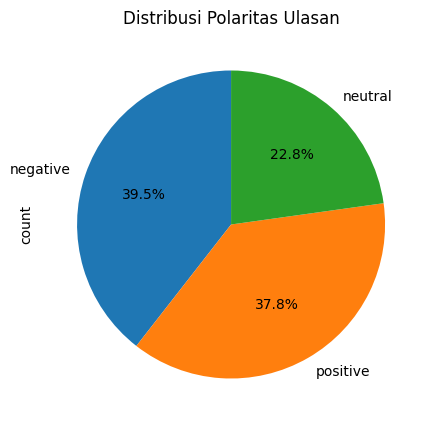

In [20]:
clean_df['polarity'].value_counts().plot(kind='pie', color=['green', 'red'], figsize=(10, 5), autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Polaritas Ulasan')

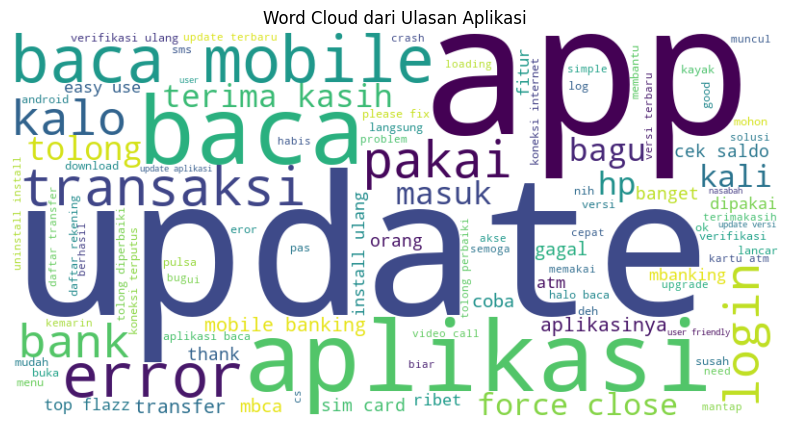

In [21]:
# Menampilkan semua ulasan
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis'  
).generate(clean_df['text_akhir'].str.cat(sep=' '))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Ulasan Aplikasi')
plt.show()

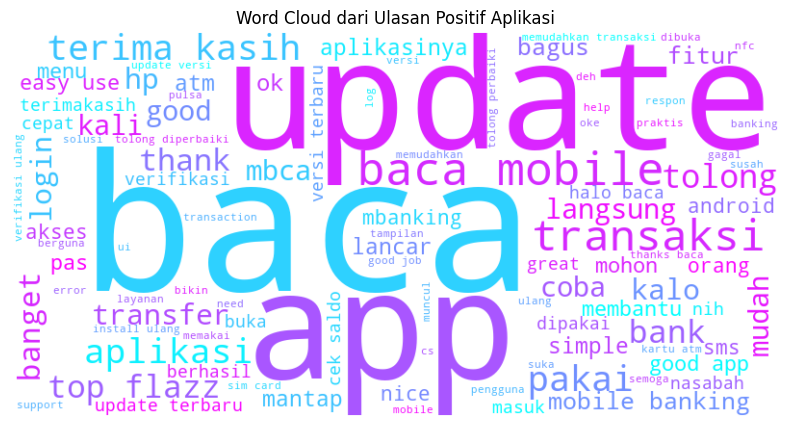

In [22]:
# Menampilkan word cloud ulasan positif
positive_reviews = clean_df[clean_df['polarity'] == 'positive']
# positive_reviews = positive_reviews[['content', 'polarity_score']]

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='cool'  
).generate(positive_reviews['text_akhir'].str.cat(sep=' '))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud dari Ulasan Positif Aplikasi')
plt.show()

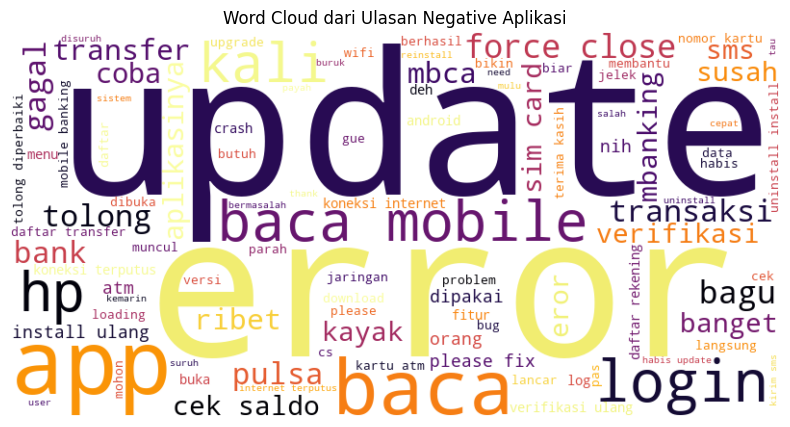

In [23]:
# Menampilkan wordcloud untuk ulasan negatif
positive_reviews = clean_df[clean_df['polarity'] == 'negative']
# positive_reviews = positive_reviews[['content', 'polarity_score']]

# Daftar kata yang dikecualikan dari wordcloud
excluded_words = {'aplikasi', 'dana', 'apk', 'pakai', 'kalo', 'masuk'}  # contoh, bisa ditambah sesuai kebutuhan

all_words = positive_reviews['text_akhir'].str.cat(sep=' ')

filtered_words = ' '.join(word for word in all_words.split() if word not in excluded_words)

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='inferno' 
).generate(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud dari Ulasan Negative Aplikasi')
plt.show()

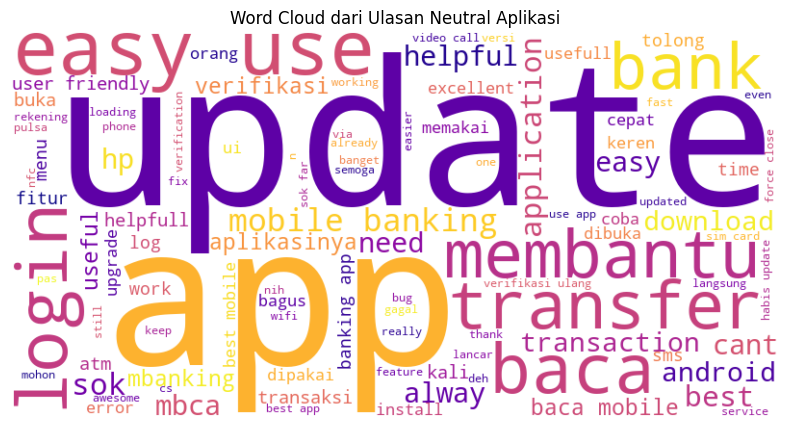

In [24]:
# Menampilkan wordcloud untuk ulasan neutral
positive_reviews = clean_df[clean_df['polarity'] == 'neutral']
# positive_reviews = positive_reviews[['content', 'polarity_score']]

# Gabungkan semua kata dari kolom 'text_akhir' menjadi satu string
all_words = positive_reviews['text_akhir'].str.cat(sep=' ')

filtered_words = ' '.join(word for word in all_words.split() if word not in excluded_words)

wordcloud_positive = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap='plasma'  
).generate(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')   
plt.axis('off')
plt.title('Word Cloud dari Ulasan Neutral Aplikasi')
plt.show()

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = clean_df['text_akhir']
y = clean_df['polarity']

y = y.map({ 'negative': 0, 'positive': 1, 'neutral': 2})



In [66]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Pipeline TF-IDF dan klasifikasi
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Parameter grid untuk TF-IDF dan Logistic Regression
param_grid = {
    'tfidf__max_df': [0.5, 0.6, 0.7],
    'tfidf__min_df': [1.8, 2, 2.2],
    'tfidf__max_features': [4400, 4500, 4600],
    'tfidf__ngram_range': [(1, 1)],
    'clf__C': [130, 140, 150]  
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:")
print(grid_search.best_params_)
print("Best Accuracy:")
print(grid_search.best_score_)

c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\taqiy\App

Best Parameters:
{'clf__C': 140, 'tfidf__max_df': 0.5, 'tfidf__max_features': 4400, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}
Best Accuracy:
0.9173155003582517


In [27]:
tfidf = TfidfVectorizer(max_features=4400, min_df=2, max_df=0.6, ngram_range=(1, 1))
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=40, stratify=y)

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_res.shape, y_train_res.shape

((39651, 4400), (39651,))

In [29]:
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler

tokenized_text = [word_tokenize(text) for text in clean_df['text_akhir']]

model = Word2Vec(sentences=tokenized_text, vector_size=200, window=5, min_count=5, workers=4, epochs=15)
wv = model.wv  

def get_word_vectors(text):
    words = word_tokenize(text)
    vectors = [wv[word] for word in words if word in wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(wv.vector_size)

X_word2vec = np.array([get_word_vectors(text) for text in clean_df['text_akhir']])

scaler = StandardScaler()
X_word2vec_scaled = scaler.fit_transform(X_word2vec)

y_word2vec = clean_df['polarity']

y_word2vec = y_word2vec.map({'positive': 1, 'negative': 0, 'neutral': 2})

X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(X_word2vec_scaled, y_word2vec, test_size=0.2, random_state=42, stratify=y_word2vec)

In [30]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

model_lr_word2vec = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42)
model_lr_word2vec.fit(X_train_word2vec, y_train_word2vec)

y_pred_lr_word2vec_train = model_lr_word2vec.predict(X_train_word2vec)
y_pred_lr_word2vec_test = model_lr_word2vec.predict(X_test_word2vec)

model_lr_tfidf = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs',random_state=42)
model_lr_tfidf.fit(X_train_res, y_train_res)

y_pred_lr_tfidf_train = model_lr_tfidf.predict(X_train_res)
y_pred_lr_tfidf_test = model_lr_tfidf.predict(X_test)







c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [31]:
model_xgb_word2vec = XGBClassifier(random_state=42)
model_xgb_word2vec.fit(X_train_word2vec, y_train_word2vec)

y_pred_xgb_word2vec_train = model_xgb_word2vec.predict(X_train_word2vec)
y_pred_xgb_word2vec_test = model_xgb_word2vec.predict(X_test_word2vec)

model_xgb_tfidf = XGBClassifier(random_state=42)
model_xgb_tfidf.fit(X_train_res, y_train_res)

y_pred_xgb_tfidf_train = model_xgb_tfidf.predict(X_train_res)
y_pred_xgb_tfidf_test = model_xgb_tfidf.predict(X_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest untuk Word2Vec
model_rf_word2vec = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_word2vec.fit(X_train_word2vec, y_train_word2vec)

y_pred_rf_word2vec_train = model_rf_word2vec.predict(X_train_word2vec)
y_pred_rf_word2vec_test = model_rf_word2vec.predict(X_test_word2vec)

# Random Forest untuk TF-IDF
model_rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf_tfidf.fit(X_train_res, y_train_res)

y_pred_rf_tfidf_train = model_rf_tfidf.predict(X_train_res)
y_pred_rf_tfidf_test = model_rf_tfidf.predict(X_test)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    # plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative', 'Neutral'])
    # plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative', 'Neutral'], rotation=0)
    plt.show()


Logistic Regression Word2Vec Train Accuracy: 0.7902734654884165
Logistic Regression Word2Vec Test Accuracy: 0.7953188440410796
Logistic Regression TF-IDF Train Accuracy: 0.9336460618899901
Logistic Regression TF-IDF Test Accuracy: 0.89992834965369


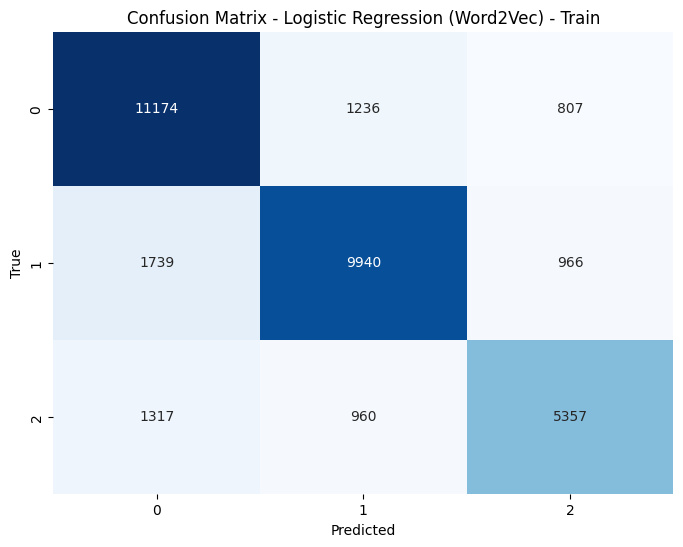

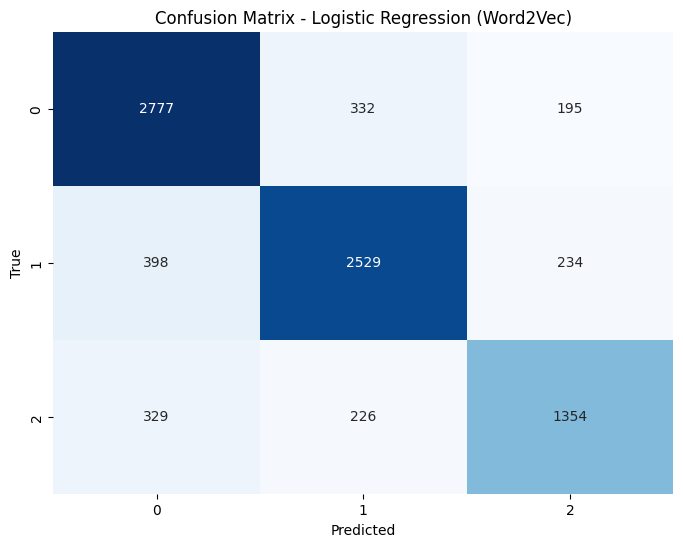

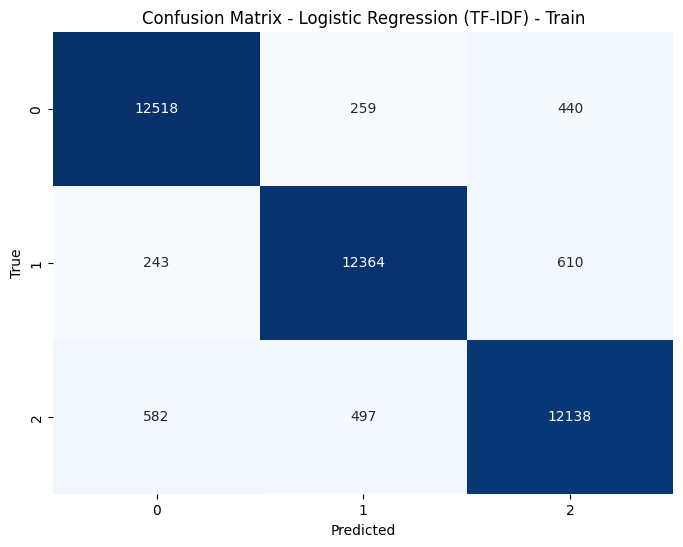

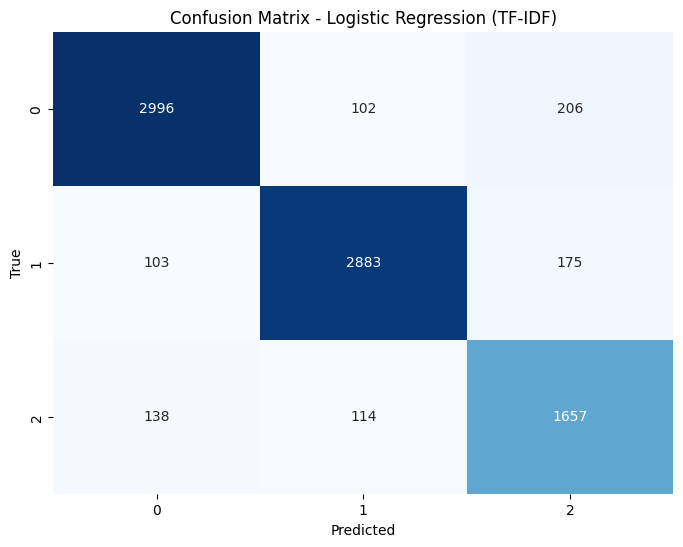

In [34]:
from sklearn.metrics import classification_report, accuracy_score
# accuracy score
print("Logistic Regression Word2Vec Train Accuracy:", accuracy_score(y_train_word2vec, y_pred_lr_word2vec_train))
print("Logistic Regression Word2Vec Test Accuracy:", accuracy_score(y_test_word2vec, y_pred_lr_word2vec_test))

print("Logistic Regression TF-IDF Train Accuracy:", accuracy_score(y_train_res, y_pred_lr_tfidf_train))
print("Logistic Regression TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_lr_tfidf_test))

# Plot confusion matrix untuk model Logistic Regression dengan Word2Vec
plot_confusion_matrix(y_train_word2vec, y_pred_lr_word2vec_train, title='Confusion Matrix - Logistic Regression (Word2Vec) - Train')
plot_confusion_matrix(y_test_word2vec, y_pred_lr_word2vec_test, title='Confusion Matrix - Logistic Regression (Word2Vec)')

# Plot confusion matrix untuk model Logistic Regression dengan TF-IDF
plot_confusion_matrix(y_train_res, y_pred_lr_tfidf_train, title='Confusion Matrix - Logistic Regression (TF-IDF) - Train')
plot_confusion_matrix(y_test, y_pred_lr_tfidf_test, title='Confusion Matrix - Logistic Regression (TF-IDF)')

XGBoost Word2Vec Train Accuracy: 0.9728922856460472
XGBoost Word2Vec Test Accuracy: 0.8029615476474803
XGBoost TF-IDF Train Accuracy: 0.9040125091422663
XGBoost TF-IDF Test Accuracy: 0.8465488416527347


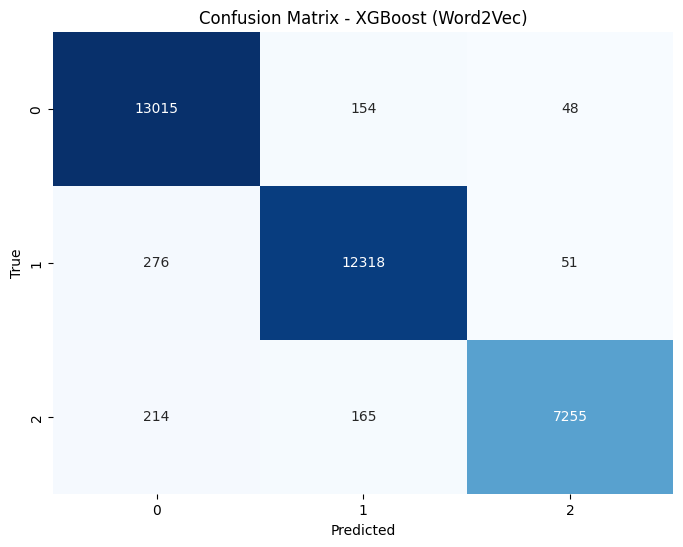

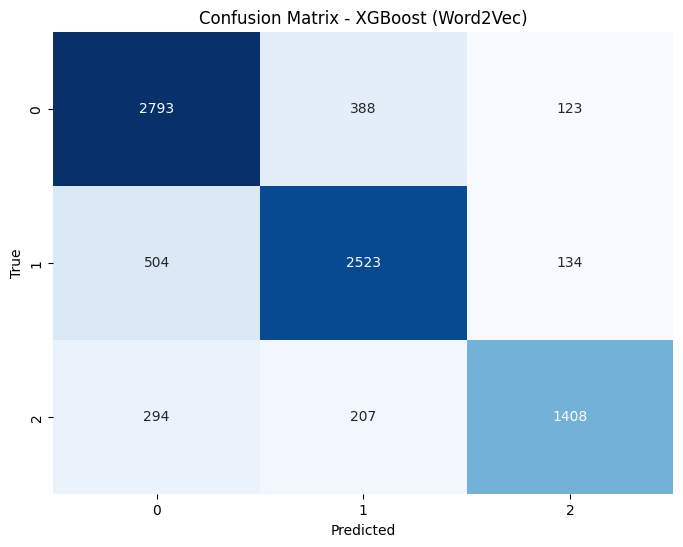

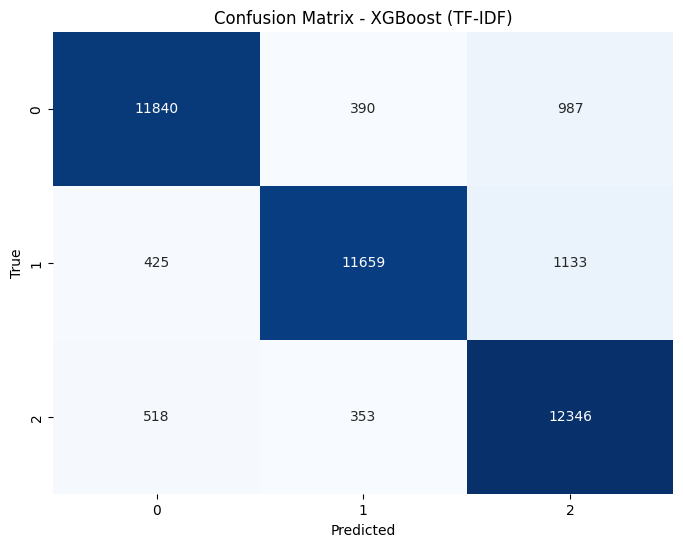

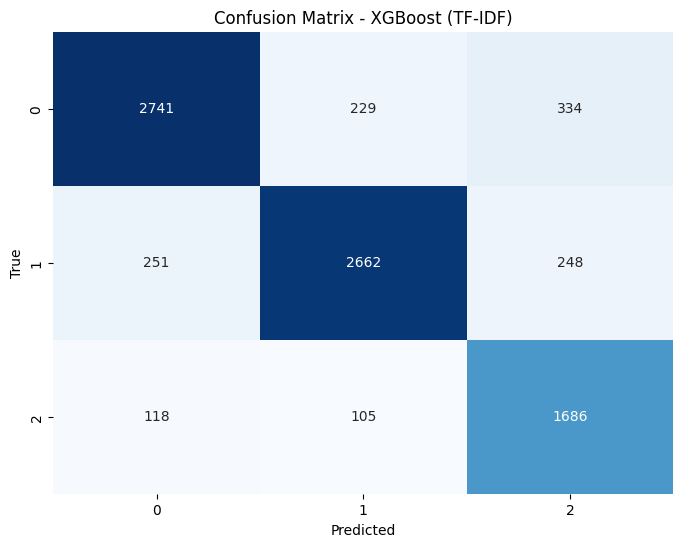

In [35]:
print("XGBoost Word2Vec Train Accuracy:", accuracy_score(y_train_word2vec, y_pred_xgb_word2vec_train))
print("XGBoost Word2Vec Test Accuracy:", accuracy_score(y_test_word2vec, y_pred_xgb_word2vec_test))

print("XGBoost TF-IDF Train Accuracy:", accuracy_score(y_train_res, y_pred_xgb_tfidf_train))
print("XGBoost TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_xgb_tfidf_test))

# plot confusion matrix untuk model xgboost dengan Word2Vec
plot_confusion_matrix(y_train_word2vec, y_pred_xgb_word2vec_train, title='Confusion Matrix - XGBoost (Word2Vec)')
plot_confusion_matrix(y_test_word2vec, y_pred_xgb_word2vec_test, title='Confusion Matrix - XGBoost (Word2Vec)')

# plot confusion matrix untuk model xgboost dengan TF-IDF
plot_confusion_matrix(y_train_res, y_pred_xgb_tfidf_train, title='Confusion Matrix - XGBoost (TF-IDF)')
plot_confusion_matrix(y_test, y_pred_xgb_tfidf_test, title='Confusion Matrix - XGBoost (TF-IDF)')

SVM Word2Vec Train Accuracy: 0.9989550991163124
rf Word2Vec Test Accuracy: 0.7782421781705279
rf TF-IDF Train Accuracy: 0.9990164182492245
rf TF-IDF Test Accuracy: 0.8680439455457368


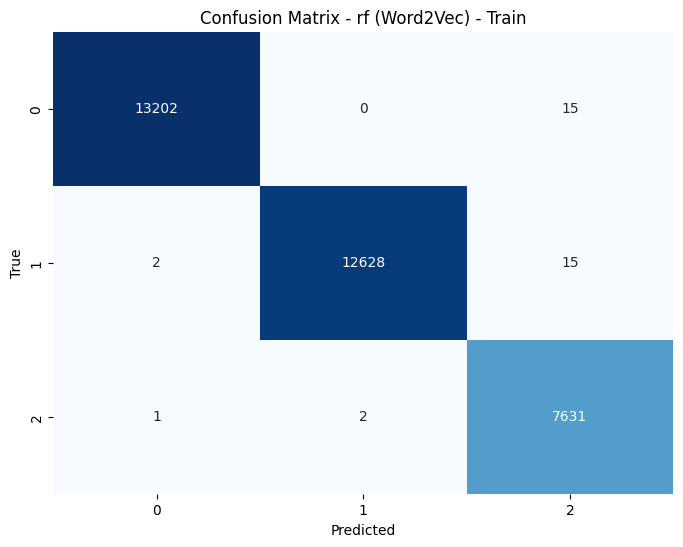

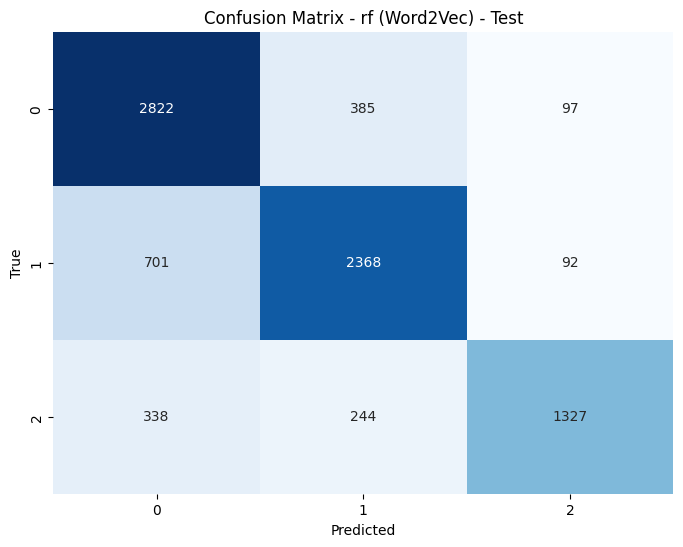

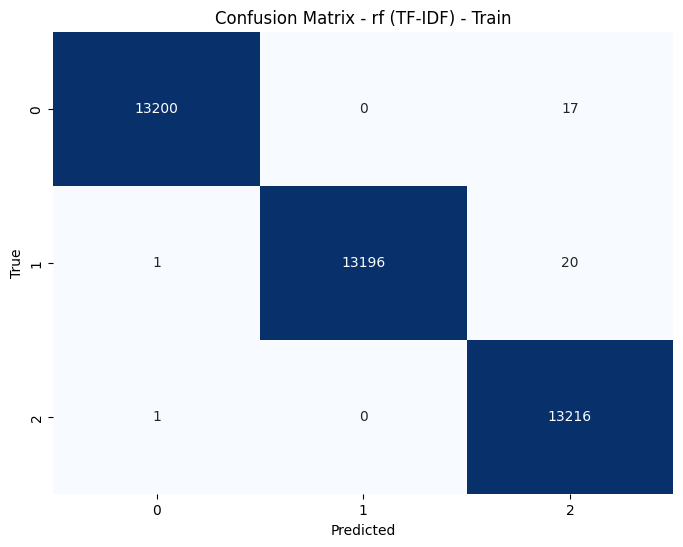

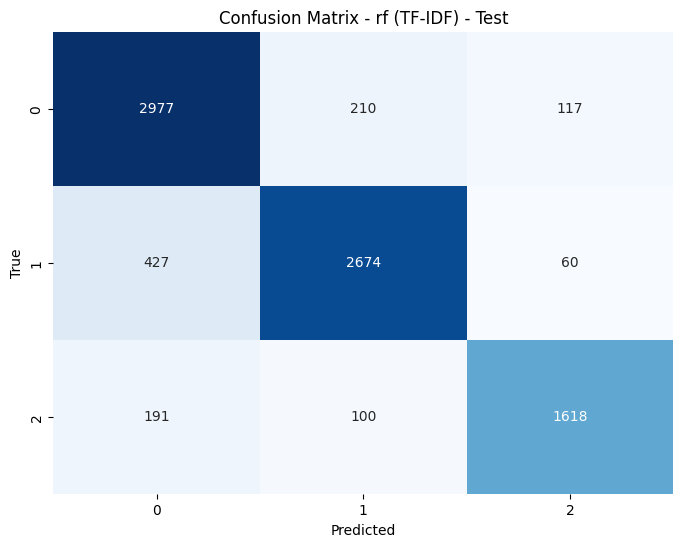

In [36]:
print("SVM Word2Vec Train Accuracy:", accuracy_score(y_train_word2vec, y_pred_rf_word2vec_train))
print("rf Word2Vec Test Accuracy:", accuracy_score(y_test_word2vec, y_pred_rf_word2vec_test))

print("rf TF-IDF Train Accuracy:", accuracy_score(y_train_res, y_pred_rf_tfidf_train))
print("rf TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_rf_tfidf_test))

# plot confusion matrix untuk model Random Forest dengan Word2Vec
plot_confusion_matrix(y_train_word2vec, y_pred_rf_word2vec_train, title='Confusion Matrix - rf (Word2Vec) - Train')
plot_confusion_matrix(y_test_word2vec, y_pred_rf_word2vec_test, title='Confusion Matrix - rf (Word2Vec) - Test')

# plot confusion matrix untuk model Random Forest dengan TF-IDF
plot_confusion_matrix(y_train_res, y_pred_rf_tfidf_train, title='Confusion Matrix - rf (TF-IDF) - Train')
plot_confusion_matrix(y_test, y_pred_rf_tfidf_test, title='Confusion Matrix - rf (TF-IDF) - Test')

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.optim import AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

c:\Users\taqiy\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [38]:
MODEL_NAME = 'indobenchmark/indobert-base-p1' 
MAX_LEN = 128  # Panjang maksimum sekuens token
BATCH_SIZE = 16 
EPOCHS = 3 # Jumlah epoch untuk fine-tuning
LEARNING_RATE = 2e-5


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
texts = clean_df['text_akhir'].tolist()  
labels = clean_df['polarity'].map({'positive': 1, 'negative': 0, 'neutral': 2}).tolist()  


In [41]:
unique_labels = np.unique(labels)
num_labels = len(unique_labels)
print(f"Number of unique labels: {num_labels}")

Number of unique labels: 3


In [42]:
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)


In [43]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
def tokenize_data(texts, tokenizer, max_len):
    return tokenizer(
        texts,
        padding='max_length',    # Pad ke max_len
        truncation=True,         # Truncate jika lebih panjang dari max_len
        max_length=max_len,
        return_attention_mask=True,
        return_tensors='pt'      
    )


In [45]:
train_encodings = tokenize_data(train_texts, tokenizer, MAX_LEN)
val_encodings = tokenize_data(val_texts, tokenizer, MAX_LEN)

In [46]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [47]:
train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)


In [48]:
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_labels 
).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0, 
    num_training_steps=total_steps
)

In [ ]:
print("\n--- Mulai Fine-tuning ---")
for epoch in range(EPOCHS):
    model.train()
    total_train_loss = 0
    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

        # if (batch_idx + 1) % 1 == 0: # Cetak setiap 'n' batch
        #      print(f"Epoch {epoch + 1}/{EPOCHS} | Batch {batch_idx + 1}/{len(train_loader)} | Loss: {loss.item():.4f}")


    avg_train_loss = total_train_loss / len(train_loader)


    # Evaluasi pada validation set setiap akhir epoch
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    all_preds = []
    all_true_labels = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            total_eval_loss += loss.item()
            preds = torch.argmax(logits, dim=1).flatten()

            all_preds.extend(preds.cpu().numpy())
            all_true_labels.extend(labels.cpu().numpy())

    avg_val_loss = total_eval_loss / len(val_loader)
    val_accuracy = accuracy_score(all_true_labels, all_preds)
    print(f"  Validation Loss: {avg_val_loss:.4f}")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")
    print(classification_report(all_true_labels, all_preds, zero_division=0))
    print("-" * 30)

print("--- Fine-tuning Selesai ---")


--- Mulai Fine-tuning ---
  Validation Loss: 0.2429
  Validation Accuracy: 0.9213
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3304
           1       0.92      0.94      0.93      3161
           2       0.94      0.86      0.90      1909

    accuracy                           0.92      8374
   macro avg       0.92      0.91      0.92      8374
weighted avg       0.92      0.92      0.92      8374

------------------------------
  Validation Loss: 0.2047
  Validation Accuracy: 0.9371
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3304
           1       0.94      0.96      0.95      3161
           2       0.93      0.88      0.90      1909

    accuracy                           0.94      8374
   macro avg       0.94      0.93      0.93      8374
weighted avg       0.94      0.94      0.94      8374

------------------------------
  Validation Loss: 0.2331
  Validatio

In [54]:
print(classification_report(all_true_labels, all_preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3304
           1       0.96      0.95      0.95      3161
           2       0.90      0.91      0.90      1909

    accuracy                           0.94      8374
   macro avg       0.94      0.94      0.94      8374
weighted avg       0.94      0.94      0.94      8374



In [55]:
def predict_sentiment(text, model, tokenizer, device, max_len=128):
    model.eval() # Set model ke mode evaluasi
    encoding = tokenizer(
        text,
        return_tensors='pt',
        max_length=max_len,
        padding='max_length',
        truncation=True
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).flatten().item()


    if num_labels == 3: label_map = {1:"positive", 0:"negative", 2:"netral"}

    return label_map.get(prediction, "Tidak Diketahui")

In [65]:
print("\n--- Contoh Prediksi ---")
contoh_ulasan_1 = "sangat baik"
prediksi_1 = predict_sentiment(contoh_ulasan_1, model, tokenizer, device, MAX_LEN)
print(f"Ulasan: '{contoh_ulasan_1}'\nPrediksi Sentimen: {prediksi_1}")

contoh_ulasan_2 = "Sangat buruk, tidak bisa dipakai sama sekali."
prediksi_2 = predict_sentiment(contoh_ulasan_2, model, tokenizer, device, MAX_LEN)
print(f"Ulasan: '{contoh_ulasan_2}'\nPrediksi Sentimen: {prediksi_2}")


--- Contoh Prediksi ---
Ulasan: 'sangat baik'
Prediksi Sentimen: positive
Ulasan: 'Sangat buruk, tidak bisa dipakai sama sekali.'
Prediksi Sentimen: negative
